<a href="https://colab.research.google.com/github/jloroz10/machine_learning/blob/master/Tare3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea de Modelos No-Lineales y Funciones de Costo**

In [82]:
import numpy as np    # biblioteca para el manejo de vectores y matrices en python.
import pandas as pd   # biblioteca para el manejo de datos y tablas.
import matplotlib.pyplot as plt   # biblioteca para visualización de datos.
import statsmodels.api as sm      # biblioteca para pruebas estadísticas.

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
mypath_train = "/content/drive/My Drive/data/datatrain.csv"
mypath_test = "/content/drive/My Drive/data/datatest.csv" 

In [85]:
df_train = pd.read_csv(mypath_train)
df_train.head()

,xtrain,ytrain
0,1.414141,0.347638
1,0.040404,0.296082
2,0.343434,1.353506
3,1.717172,1.100935
4,0.101010,0.636017


In [86]:
df_test = pd.read_csv(mypath_test)
df_test.head()

,xtest,ytest
0,0.363636,1.424585
1,0.525253,1.053235
2,1.575758,0.266515
3,1.838384,2.878358
4,0.989899,-0.184339


**2. Los siguientes incisos se basan en los datos de los archivos que se encuentran en Canvas: datatrain.csv, y datatest.csv. Los datos fueron generados aleatoriamente a partir de la función cúbica y= 5x^3-12.5x^2+7.5x  incluyendo ruido gaussiano con media 0 y desviación estándar 0.5.**

In [87]:
df_train.shape

(80, 2)

In [88]:
df_train.describe()

,xtrain,ytrain
count,80.000000,80.000000
mean,1.014394,0.816098
std,0.585922,1.280141
min,0.000000,-1.145724
25%,0.560606,0.041906
50%,1.050505,0.577697
75%,1.500000,1.160240
max,2.000000,4.906539


In [89]:
df_train.corr(method='pearson')

,xtrain,ytrain
xtrain,1.000000,0.330087
ytrain,0.330087,1.000000


In [90]:
y_train = df_train[['ytrain']]
y_test = df_test[['ytest']]

  **a. Obtener la gráfica de dispersión de los datos de entrenamiento (train), x vs y.**

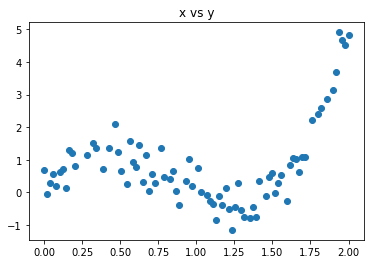

In [91]:
plt.scatter(df_train.loc[:,["xtrain"]],y_train)
plt.title("x vs y")
plt.show()

**b. Obtener la gráfica de dispersión de los datos de prueba (test), x vs y.**

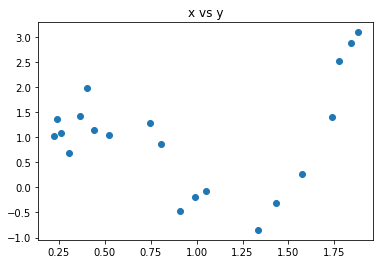

In [92]:
plt.scatter(df_test.loc[:,["xtest"]],y_test)
plt.title("x vs y")
plt.show()

**c. Incluir además la gráfica de la función cúbica 𝑦 = 5𝑥^3− 12.5𝑥^2 + 7.5𝑥 en las dos gráficas anteriores.**

In [93]:
def plot_linear_eq(a,b,clr):
  x = np.arange(0,2,0.001)
  y = [(a*i + b) for i in x]
  plt.plot(x,y,label='linear',linestyle='-',color=clr)

In [94]:
def plot_cubic_eq(a,b,c,d,clr):
  x = np.arange(0,2,0.001)
  y = [(a*i**3 +b*i**2 + c*i + d) for i in x]
  plt.plot(x,y,label='linear',linestyle='-',color=clr)


**𝑦 = 5𝑥^3− 12.5𝑥^2 + 7.5𝑥 con la grafica con los datos (train)**

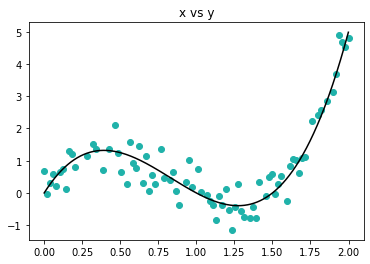

In [95]:
plot_cubic_eq(5,-12.5,7.5,0,'k')
plt.scatter(df_train.loc[:,["xtrain"]],y_train,color='lightseagreen')
plt.title("x vs y")
plt.show(block=False)

**𝑦 = 5𝑥^3− 12.5𝑥^2 + 7.5𝑥 con la grafica con los datos (test)**

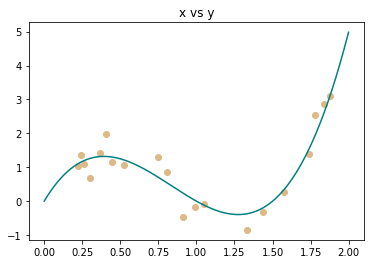

In [96]:
plot_cubic_eq(5,-12.5,7.5,0,'teal')
plt.scatter(df_test.loc[:,["xtest"]],y_test,color='burlywood')
plt.title("x vs y")
plt.show(block=False)

**d. Contestar los sigueintes incisos:**

**i. Usando los datos de entrenamiento (train), obtener el modelo de regresión lineal 𝑦 = 𝛽0 + 𝛽1X. Interpreta el valor de significancia de cada uno de los coeficientes del modelo obtenidos.**

In [97]:
x_train = df_train[['xtrain']]
y_train = df_train[['ytrain']]
xones = sm.add_constant(x_train)
print(xones)

    const    xtrain
0     1.0  1.414141
1     1.0  0.040404
2     1.0  0.343434
3     1.0  1.717172
4     1.0  0.101010
..    ...       ...
75    1.0  1.676768
76    1.0  1.353535
77    1.0  0.505051
78    1.0  1.373737
79    1.0  0.949495

[80 rows x 2 columns]


In [98]:
mimodelo = sm.OLS(y_train, xones).fit()

In [99]:
print(mimodelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 ytrain   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     9.538
Date:                Mon, 14 Sep 2020   Prob (F-statistic):            0.00279
Time:                        06:42:39   Log-Likelihood:                -128.16
No. Observations:                  80   AIC:                             260.3
Df Residuals:                      78   BIC:                             265.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0845      0.273      0.309      0.7

Despues de analizar los coeficientes se puede observar que los valores obtenidos son malos ya que el p-value de la constante es 0.758 lo cual no es aceptable. El valor de r-square como se muestra en el reporte se puede interpretar como malo ya que la varianza de Y solo se puede interpretar en un 10.9% 

In [100]:
def plot_linear_eq(m,b,clr):
  x = np.arange(0,2,0.001)
  y = [(m*i + b) for i in x]
  plt.plot(x,y,label='linear',linestyle='-',color=clr)

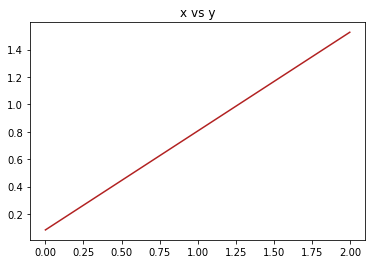

In [101]:
plot_linear_eq(0.7212,0.0845,'firebrick')
plt.title("x vs y")
plt.show(block=False)

**ii. Incluir la gráfica de dispersión de los datos de entrenamiento, junto con la gráfica de la recta de regresión 𝑦􀷜 obtenida**

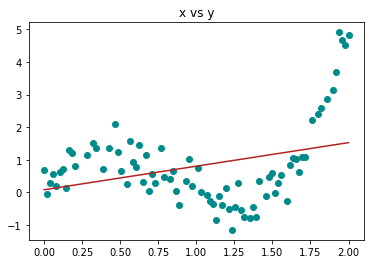

In [102]:
plot_linear_eq(0.7212,0.0845,'firebrick')
plt.scatter(df_train.loc[:,["xtrain"]],y_train,color='darkcyan')
plt.title("x vs y")
plt.show(block=False)

**iii. Usando los datos de prueba (test), obtener el valor del error cuadrático
medio MSE y el coeficiente de determinación ajustado 𝑅^2.**

In [118]:
x_test = df_test[['xtest']]
y_test = df_test[['ytest']]
print(type(x_test))
xones2 = sm.add_constant(x_test)
print(xones2)

<class 'pandas.core.frame.DataFrame'>
    const     xtest
0     1.0  0.363636
1     1.0  0.525253
2     1.0  1.575758
3     1.0  1.838384
4     1.0  0.989899
5     1.0  0.303030
6     1.0  1.878788
7     1.0  1.434343
8     1.0  1.737374
9     1.0  0.444444
10    1.0  0.262626
11    1.0  0.808081
12    1.0  1.050505
13    1.0  0.242424
14    1.0  1.777778
15    1.0  0.909091
16    1.0  0.222222
17    1.0  1.333333
18    1.0  0.404040
19    1.0  0.747475


In [104]:
mimodelo2 = sm.OLS(y_test, xones2).fit()
print(mimodelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ytest   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.6137
Date:                Mon, 14 Sep 2020   Prob (F-statistic):              0.444
Time:                        06:42:39   Log-Likelihood:                -29.165
No. Observations:                  20   AIC:                             62.33
Df Residuals:                      18   BIC:                             64.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7002      0.466      1.503      0.1

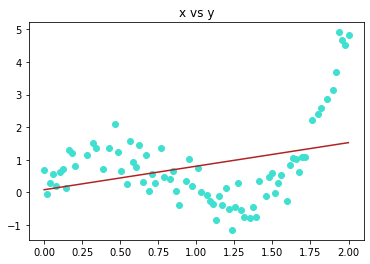

In [105]:
b=mimodelo.params[0]
m=mimodelo.params[1]

plot_linear_eq(m,b,'firebrick')
plt.scatter(df_train.loc[:,["xtrain"]],y_train,color='turquoise')
plt.title("x vs y")
plt.show(block=False)

In [106]:
print(mimodelo2.params)

const    0.700243
xtest    0.329297
dtype: float64


In [107]:
print(x_test)
print(type(x_test.values.tolist()))

       xtest
0   0.363636
1   0.525253
2   1.575758
3   1.838384
4   0.989899
5   0.303030
6   1.878788
7   1.434343
8   1.737374
9   0.444444
10  0.262626
11  0.808081
12  1.050505
13  0.242424
14  1.777778
15  0.909091
16  0.222222
17  1.333333
18  0.404040
19  0.747475
<class 'list'>


In [108]:
def get_y_values(m,b,x_data):
  x = x_data.loc[:,'xtest'].to_numpy()
  ys= [(m*i + b) for i in x]
  return ys
  

0.3292969520527159 0.7002426371035548


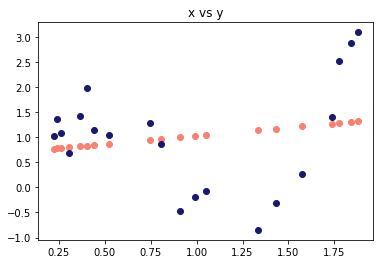

In [109]:
b = mimodelo2.params[0]
m = mimodelo2.params[1]
print(m,b)
y_gorro=get_y_values(m,b,x_test)
# print(y_gorro)
plt.scatter(x_test,y_gorro,color='salmon')
plt.scatter(x_test,y_test,color='midnightblue')
plt.title("x vs y")
plt.show(block=False)


In [110]:
print(type(y_gorro))
print(y_gorro)
y_test_arr = y_test.loc[:,'ytest'].to_numpy()
print(y_test_arr)

<class 'list'>
[0.8199869834242868, 0.8732066926440478, 1.2191348040543306, 1.3056168316599286, 1.0262133573506167, 0.8000295922610658, 1.3189217592118418, 1.1725675581165809, 1.2723545132740917, 0.8465968378695188, 0.7867246650384498, 0.9663411841902507, 1.0461707485138376, 0.7800722010978448, 1.2856594408260047, 0.9996035025760879, 0.7734197374865368, 1.1393052397307437, 0.8332919106469028, 0.9463837930270298]
[ 1.42458487  1.05323527  0.26651477  2.87835809 -0.1843394   0.68272102
  3.09673464 -0.31757353  1.40060558  1.14829903  1.0935675   0.87282894
 -0.078668    1.35691842  2.53227081 -0.47706215  1.0356331  -0.84780714
  1.97977005  1.29500947]


In [111]:
def np_calculate_mse(y,y_gorro):
  square_values =  np.square(np.subtract(y,y_gorro))
  # print(square_values)
  MSE = np.square(np.subtract(y,y_gorro)).mean() 
  # print(MSE)
  return MSE



In [112]:
def calculate_mse(y,y_gorro):
  total = len(y_gorro)
  #create dataframe
  df = pd.DataFrame(columns=list(['y','y_gorro','subs','squared_value']))

  for i in range(total):
    subs = y[i] - y_gorro[i]
    new_row = {'y':y[i],'y_gorro':y_gorro[i],'subs':subs,'squared_value':subs**2}
    df = df.append(new_row, ignore_index=True)  
  
  # print(df)
  # print(df.loc[:,['squared_value']].mean())
  MSE = float(df.loc[:,['squared_value']].mean())
  return MSE 

In [113]:
print('numpy: ',np_calculate_mse(y_test_arr,y_gorro))
print('calc:  ',calculate_mse(y_test_arr,y_gorro))


numpy:  1.0817787730763668
calc:   1.0817787730763668


**iv. Repite los incisos i, ii, iii para obtener el modelo de regresión cuadrático: y = B0 + B1x +B2x^2**

In [125]:
xones_cuad = xones2.copy()
xones_cuad["xtest2"] = np.square(xones2["xtest"])
print(xones_cuad)



    const     xtest    xtest2
0     1.0  0.363636  0.132231
1     1.0  0.525253  0.275890
2     1.0  1.575758  2.483012
3     1.0  1.838384  3.379655
4     1.0  0.989899  0.979900
5     1.0  0.303030  0.091827
6     1.0  1.878788  3.529844
7     1.0  1.434343  2.057341
8     1.0  1.737374  3.018468
9     1.0  0.444444  0.197531
10    1.0  0.262626  0.068973
11    1.0  0.808081  0.652995
12    1.0  1.050505  1.103561
13    1.0  0.242424  0.058770
14    1.0  1.777778  3.160494
15    1.0  0.909091  0.826446
16    1.0  0.222222  0.049383
17    1.0  1.333333  1.777778
18    1.0  0.404040  0.163249
19    1.0  0.747475  0.558718


In [126]:
mimodelo3 = sm.OLS(y_test, xones_cuad).fit()
print(mimodelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                  ytest   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     12.51
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           0.000457
Time:                        07:04:36   Log-Likelihood:                -20.451
No. Observations:                  20   AIC:                             46.90
Df Residuals:                      17   BIC:                             49.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0259      0.570      5.308      0.0

In [127]:
def get_y_values_cuadratica(b0,b1,b2,x_data):
  x = x_data.loc[:,'xtest'].to_numpy()
  ys= [(b0+ b1*i+b2*i**2) for i in x]
  return ys

3.0259199323798107 -6.372637832010861 3.2486998362057227


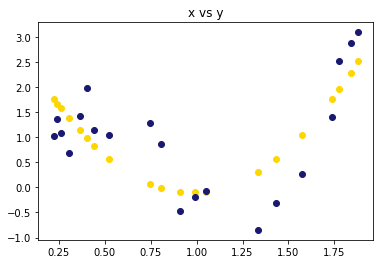

In [147]:
b0 = mimodelo3.params[0]
b1 = mimodelo3.params[1]
b2 = mimodelo3.params[2]
print(b0,b1,b2)
y_gorro=get_y_values_cuadratica(b0,b1,b2,x_test)
# print(y_gorro)
plt.scatter(x_test,y_gorro,color='lime')
plt.scatter(x_test,y_test,color='midnightblue')
plt.title("x vs y")
plt.show(block=False)

**v. Repite los incisos i, ii, iii para obtener el modelo de regresión cúbico: y = B0 + B1x +B2x^2 +B3x^3.**

In [149]:
xones_cub = xones_cuad.copy()
xones_cub["xtest3"] = np.multiply(xones_cuad["xtest"],xones_cuad["xtest2"])
print(xones_cub)

    const     xtest    xtest2    xtest3
0     1.0  0.363636  0.132231  0.048084
1     1.0  0.525253  0.275890  0.144912
2     1.0  1.575758  2.483012  3.912625
3     1.0  1.838384  3.379655  6.213103
4     1.0  0.989899  0.979900  0.970002
5     1.0  0.303030  0.091827  0.027826
6     1.0  1.878788  3.529844  6.631828
7     1.0  1.434343  2.057341  2.950934
8     1.0  1.737374  3.018468  5.244206
9     1.0  0.444444  0.197531  0.087791
10    1.0  0.262626  0.068973  0.018114
11    1.0  0.808081  0.652995  0.527672
12    1.0  1.050505  1.103561  1.159296
13    1.0  0.242424  0.058770  0.014247
14    1.0  1.777778  3.160494  5.618656
15    1.0  0.909091  0.826446  0.751315
16    1.0  0.222222  0.049383  0.010974
17    1.0  1.333333  1.777778  2.370370
18    1.0  0.404040  0.163249  0.065959
19    1.0  0.747475  0.558718  0.417628


In [150]:
mimodelo4 = sm.OLS(y_test, xones_cub).fit()
print(mimodelo4.summary())

                            OLS Regression Results                            
Dep. Variable:                  ytest   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     47.13
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           3.63e-08
Time:                        07:22:36   Log-Likelihood:                -6.6388
No. Observations:                  20   AIC:                             21.28
Df Residuals:                      16   BIC:                             25.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5157      0.591     -0.872      0.3

In [141]:
def get_y_values_cubica(b0,b1,b2,b3,x_data):
  x = x_data.loc[:,'xtest'].to_numpy()
  ys= [(b0+ b1*i+b2*i**2+b3*i**3) for i in x]
  return ys

-0.5157362149372078 10.114214125175085 -15.869581550148522 6.178257924290669


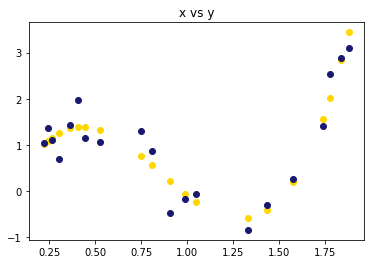

In [148]:
b0 = mimodelo4.params[0]
b1 = mimodelo4.params[1]
b2 = mimodelo4.params[2]
b3 = mimodelo4.params[3]
print(b0,b1,b2,b3)
y_gorro=get_y_values_cubica(b0,b1,b2,b3,x_test)
# print(y_gorro)
plt.scatter(x_test,y_gorro,color='gold')
plt.scatter(x_test,y_test,color='midnightblue')
plt.title("x vs y")
plt.show(block=False)

**vi. Repite los incisos i, ii, iii para el modelo de regresión de grado cuatro: y = B0 + B1x +B2x^2 +B3x^3 + B4x^4**

In [152]:
xones_cuarta = xones_cub.copy()
xones_cuarta["xtest4"] = np.multiply(xones_cuad["xtest2"],xones_cuad["xtest2"])
print(xones_cuarta)

    const     xtest    xtest2    xtest3     xtest4
0     1.0  0.363636  0.132231  0.048084   0.017485
1     1.0  0.525253  0.275890  0.144912   0.076115
2     1.0  1.575758  2.483012  3.912625   6.165348
3     1.0  1.838384  3.379655  6.213103  11.422069
4     1.0  0.989899  0.979900  0.970002   0.960204
5     1.0  0.303030  0.091827  0.027826   0.008432
6     1.0  1.878788  3.529844  6.631828  12.459798
7     1.0  1.434343  2.057341  2.950934   4.232652
8     1.0  1.737374  3.018468  5.244206   9.111146
9     1.0  0.444444  0.197531  0.087791   0.039018
10    1.0  0.262626  0.068973  0.018114   0.004757
11    1.0  0.808081  0.652995  0.527672   0.426402
12    1.0  1.050505  1.103561  1.159296   1.217847
13    1.0  0.242424  0.058770  0.014247   0.003454
14    1.0  1.777778  3.160494  5.618656   9.988721
15    1.0  0.909091  0.826446  0.751315   0.683013
16    1.0  0.222222  0.049383  0.010974   0.002439
17    1.0  1.333333  1.777778  2.370370   3.160494
18    1.0  0.404040  0.163249  

In [153]:
mimodelo5 = sm.OLS(y_test, xones_cuarta).fit()
print(mimodelo5.summary())

                            OLS Regression Results                            
Dep. Variable:                  ytest   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     34.00
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           2.33e-07
Time:                        07:24:04   Log-Likelihood:                -6.4078
No. Observations:                  20   AIC:                             22.82
Df Residuals:                      15   BIC:                             27.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1448      1.222     -0.937      0.3

In [154]:
def get_y_values_cuarta(b0,b1,b2,b3,b4,x_data):
  x = x_data.loc[:,'xtest'].to_numpy()
  ys= [(b0+ b1*i+b2*i**2+b3*i**3+b4*i**4) for i in x]
  return ys

-1.1447931227638197 13.973307308826332 -23.044325067570007 11.280911883552978 -1.2209690564566102


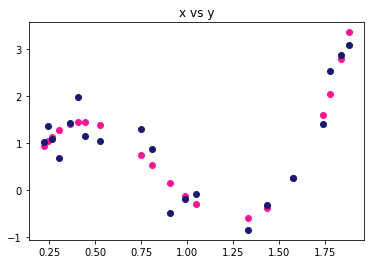

In [157]:
b0 = mimodelo5.params[0]
b1 = mimodelo5.params[1]
b2 = mimodelo5.params[2]
b3 = mimodelo5.params[3]
b4 = mimodelo5.params[4]
print(b0,b1,b2,b3,b4)
y_gorro=get_y_values_cuarta(b0,b1,b2,b3,b4,x_test)
# print(y_gorro)
plt.scatter(x_test,y_gorro,color='deeppink')
plt.scatter(x_test,y_test,color='midnightblue')
plt.title("x vs y")
plt.show(block=False)